In [1]:
# Dataset: Amazon Books Reviews
# Author: Mohamed Bekheet
# Source: Mohamed Bekheet. (2022). Amazon Books Reviews [Data set]. Kaggle. https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# This dataset contains 2 files
# The first file** reviews** file contain feedback about 3M user on 212404 unique books the data set is 
# part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 
# 142.8 million reviews spanning May 1996 - July 2014.
# Reviews Dataset Data Dictionary:
# -id:                  The Id of Book
# -Title:   	        Book Title
# -Price:               The price of Book
# -User_id:             Id of the user who rates the book
# -profileName:         Name of the user who rates the book
# -review/helpfulness:  helpfulness rating of the review, e.g. 2/3
# -review/score:        rating from 0 to 5 for the book
# -review/time:         time of given the review
# -review/summary:      the summary of a text review
# -review/text:         the full text of a review

# The second file Books Details file contains details information about 212404 unique books it file is built by using
# google books API to get details information about books it rated in the first file
# and this file contains

# Book Details Dataset Data Dictionary:
# Title:	        Book Title
# Descripe:	        Decription of book
# authors:	        Name of book authors
# image:	        Url for book cover
# previewLink:	    Link to access this book on google Books
# publisher:	    Name of the publisheer
# publishedDate:	The date of publish
# infoLink:	        Link to get more information about the book on google books
# categories:	    Genres of books
# ratingsCount:	    Averaging rating for book

# Both Datasets are linked through the unique tittle of the book.

In [2]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#-------------- TRANSFORMERS --------------
import transformers
from transformers.pipelines import PIPELINE_REGISTRY
from transformers import pipeline
import evaluate
from evaluate import load
from transformers import Conversation
transformers.logging.set_verbosity_error()

/home/arnaldochm/Documents/BootCamp_DataScience/Final_Project/final_project_nlp/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-10-29 19:44:17.340362: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-29 19:44:17.367839: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-29 19:44:17.504688: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-29 19:44:17.505826: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimize

In [3]:
#Loading the Datasets
df_rating_raw = pd.read_csv('../data/raw/Books_rating.csv')

df_rating_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [4]:
df_rating_raw[df_rating_raw['Title'] == 'West Side story']

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1814312,B000711OZC,West Side story,NaN,A3FV7U97W17PK,"M. Chaerani ""music sheet collector""",26/26,5.0,1145491200,Great transcription of the full score,If you're looking for a faithful translation f...
1814313,B000711OZC,West Side story,NaN,A14ES1GLFF6RZ9,"The Pianoman ""Producer/Arranger""",6/7,5.0,1189987200,West Side Vocal Score,If you want to play/arrange/orchestrate or sim...
1814314,B000711OZC,West Side story,NaN,APYTEBHJXFT18,Teen,4/5,4.0,1167177600,For the intermediate,The book is medium-it isn't an easy book you o...
1814315,B000711OZC,West Side story,NaN,A3H9EZYOVG81TW,Broadway Fan,1/1,5.0,1332374400,West Side Story,This book is perfect. We are rehearsing West S...
1814316,B000711OZC,West Side story,NaN,A1IWMVQGALYNVK,C. Morgan,3/4,5.0,1199145600,High Quality Printing,The piano and vocals are clearly printed which...
1814317,B000711OZC,West Side story,NaN,AZUS7ZIZWEJ0B,"Rebecca L. Gosselin ""Capegirl78""",0/0,5.0,1355702400,Fab!,this was perfect - I wanted to real versions o...
1814318,B000711OZC,West Side story,NaN,A1F2FPNK5VBJZ4,"W. Smith ""Future Tony Winner""",0/0,5.0,1264636800,A Composer/Orchestrator's Best Friend,My original intention was to buy this and use ...
1814319,B000711OZC,West Side story,NaN,A2DGD1PGXR5BZM,Olivertrst,0/1,3.0,1319241600,Disappointed -- Bent in shipping,I was disappointed when I received this book i...
1814320,B000711OZC,West Side story,NaN,A1GURUV4HPAWFU,Krista Cronin,2/9,5.0,955411200,West Side Story is Fabulous,"The music from West Side Story is captivating,..."


In [5]:
df_rating_raw.sample(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
2587441,B0006FE58W,The artist's model from Etty to Spencer,NaN,A13RB6IDSJL6NP,Scholasticus,0/0,5.0,1267574400,Jolly good collection of essays,Models are people too. They lead lives like an...
1784948,B000O2T87A,A Journey to the Centre of the Earth,NaN,A3RTNA9THAU2OP,"J. Baker ""kairilily""",0/0,4.0,1347753600,"A bit dated, but a good old adventure story.",Professor Hardwigg finds a note written by Arn...
2484664,B0006W381K,Ten Thousand Light-years from Home,NaN,A33UDDOH82EROT,Rory Coker,5/7,2.0,1211932800,"Early, and inferior Tiptree",I am pretty sure this was the first Tiptree an...
2358473,1567403581,The Heir,NaN,A14JU8VFR6ZZYG,Aubrey Pace,0/1,2.0,962582400,Disapointed .,I found the heroine and the hero so immature. ...
1679354,B00069YBGE,Across the San Juan mountains,NaN,AVEVZ15T13TYL,"Jeremy D. Hakes ""Climber Biker""",0/0,4.0,1257379200,An interesting journey through the mining regi...,The journey these guys go on in just over a mo...
517504,B00005W82P,IQ 83,NaN,A1ZLENU77A5ZHO,L. McGeer,1/1,5.0,1299196800,More relevant than ever,I picked this one out when my Dad took me to a...
548713,1581807708,Visual Chronicles: The No-Fear Guide to Creati...,NaN,A14IAHPEEMGQOG,"Peony Blue ""Muse""",5/6,5.0,1185235200,staying creative in a decidedly uncreative wor...,I have every book on art journaling known to m...
724228,B000N76Y6O,Bush At War,NaN,A18OBUSMXVE8R0,J. Guild,2/5,5.0,1072828800,"""Terrorism against this nation will not stand""",This book shows that rather than being a weak ...
2247070,B000MX0528,An Arranged Marriage,NaN,A1BQE2SEOGG4PV,"J COFFMAN ""Jackie""",0/0,5.0,1091145600,"Fantastic book, a great start to the series.",Having read &quot;Christmas angel&quot; (bk. 3...
1080952,B00085ZGFG,Crime & punishment;,NaN,ALN0TTRTLHA4E,"Tom Munro ""tomfrombrunswick""",2/4,5.0,981244800,One of the top five novels written,This is book is one of the greatest novels wri...


In [6]:
#Load Books Data Dataset
df_data_raw = pd.read_csv('../data/raw/books_data.csv')

df_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [7]:
df_data_raw.sample(10)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
35551,The lonely African,NaN,['Colin M. Turnbull'],http://books.google.com/books/content?id=LsNyA...,http://books.google.com/books?id=LsNyAAAAMAAJ&...,NaN,1968,http://books.google.com/books?id=LsNyAAAAMAAJ&...,['Acculturation'],1.0
38175,That Anvil of Our Souls: A Novel of the Monito...,Against the backdrop of one of the Civil War's...,['David Poyer'],http://books.google.com/books/content?id=dnCEp...,http://books.google.com/books?id=dnCEp17j-90C&...,Simon and Schuster,2005,http://books.google.com/books?id=dnCEp17j-90C&...,['Fiction'],NaN
39516,Essential Anatomy & Physiology in Maternity Ca...,Anatomy and physiology presented in a clear an...,['Linda Wylie'],http://books.google.com/books/content?id=QgpOv...,http://books.google.com/books?id=QgpOvSDxGGYC&...,Elsevier Health Sciences,2005-05-10,http://books.google.com/books?id=QgpOvSDxGGYC&...,['Medical'],NaN
105481,Greatest Answering Machine Messages of All Time,NaN,"['John Carfi', 'Cliff Carle']",http://books.google.com/books/content?id=hiuGo...,http://books.google.com/books?id=hiuGo-T-J8sC&...,CCC Publishing,1993-07,http://books.google.com/books?id=hiuGo-T-J8sC&...,['Telephone answering and recording apparatus'],NaN
121934,Anthropomorphic figurines: Of predynastic Egyp...,NaN,['Peter J. Ucko'],http://books.google.com/books/content?id=Mw0YA...,http://books.google.nl/books?id=Mw0YAQAAMAAJ&q...,NaN,1968,http://books.google.nl/books?id=Mw0YAQAAMAAJ&d...,['Anthropomorphism'],NaN
70014,Tips to Fly By: Thousands of PIC Hours' Worth ...,Popular Science gives our readers the informat...,NaN,http://books.google.com/books/content?id=GSEDA...,http://books.google.com/books?id=GSEDAAAAMBAJ&...,NaN,1945-08,http://books.google.com/books?id=GSEDAAAAMBAJ&...,NaN,NaN
66116,Alternative Atlanta,"In a funny, poignant, wonderfully original deb...",['Marshall Boswell'],http://books.google.com/books/content?id=5xPPT...,http://books.google.com/books?id=5xPPT_wI0cUC&...,Delacorte Press,2005-01-25,https://play.google.com/store/books/details?id...,['Fiction'],NaN
144801,The Poems of Edward Taylor.,Now considered America's foremost colonial poe...,['Edward Taylor'],http://books.google.com/books/content?id=kmbqC...,http://books.google.com/books?id=kmbqCQAAQBAJ&...,UNC Press Books,2014-12-01,https://play.google.com/store/books/details?id...,['Poetry'],NaN
151124,A History of Horoscopic Astrology,This thoroughly researched book is a history o...,['James H. Holden'],http://books.google.com/books/content?id=9p1ig...,http://books.google.com/books?id=9p1igGF3gpUC&...,American Federation of Astr,2006,http://books.google.com/books?id=9p1igGF3gpUC&...,"['Body, Mind & Spirit']",1.0
158633,Perverzion (Writings from an Unbound Europe),What was the fate of Stanislav Perfetsky--poet...,"['I͡Uriĭ Andrukhovych', 'Yuri Andrukhovych', '...",http://books.google.com/books/content?id=a6xiA...,http://books.google.com/books?id=a6xiAAAAMAAJ&...,NaN,2005,http://books.google.com/books?id=a6xiAAAAMAAJ&...,['Fiction'],NaN


In [8]:
#Revisar Valores Nulos
df_rating_raw.isna().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [9]:
df_data_raw.isna().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [10]:
#Innecesary Columns are removed
# df_rating: 
#   - Price: Almost 84% of the entries are null. 
#   - profileName: User_id provides same information.
#   - Id: Innecesary column.
#   - review/helpfulness: Unncesary column for current analysis
#   - review/summary: Unncesary column for current analysis. Many summaries used are the same Book Title.  
# df_data:
#   - image, previewLink, infoLink: Not useful information.
#   - ratingsCount: Information from Google API. Not useful for the analysis.
#   - description: Non necesary information for Analysis

df_rating_processed = df_rating_raw.drop(['Id','profileName','Price','review/helpfulness','review/summary'], axis=1).copy()
df_data_processed = df_data_raw.drop(['image','previewLink','infoLink','ratingsCount','description'], axis=1).copy()

In [11]:
df_rating_processed.sample(10)

,Title,User_id,review/score,review/time,review/text
405243,Trial by Fire (Newpointe 911 Series #4),A2FMJRU8I0IJKP,5.0,1055376000,"This book, the last in Blackstock's Newpoint 9..."
825004,The Liars Diary,A2T0U657W1KTWK,1.0,1283904000,"The writing is plain, and while there are alot..."
2316289,This is all I ask,NaN,5.0,932342400,"This book made me laugh, cry, and just be glad..."
1051693,Witchcraft: Exploring the World of Wicca,AFEO09AI1ASIR,1.0,1324425600,Sadly this book is written by a Christian from...
2650812,Maggie Cassidy (Mcgraw-Hill Paperbacks),A34WD02LUOJO8D,5.0,1026691200,This is my favorite Kerouac novel. This is a b...
981137,Pride and Prejudice,AXKVMPDJWWCEK,1.0,1201478400,This is not a good recording. Too much noise a...
14204,In the Coils of the Snake: Book III -- The Hol...,A2Z7Q5SH1CI383,3.0,1161561600,"I love this series, I really do. But the secon..."
473340,Star Trek: Ships of the Line 2006 Wall Calenda...,A3NFAKPSPR464D,5.0,1355356800,I really do like this product which is why I'm...
1267762,The Balkans: A Short History (Modern Library C...,A1RLYOPK16YXC1,3.0,1122768000,THE BALKANS: A SHORT HISTORY by Mark Mazower i...
864659,Big Russ and Me,A3GUI4IV7SKB02,5.0,1198454400,I highly recommend this audio book. Tim Russer...


In [12]:
df_rating_processed = df_rating_processed.rename(columns={'Title':'title', 
                                                        'User_id':'user_id',
                                                        'review/score': 'review',
                                                        'review/time': 'review_time',
                                                        'review/summary': 'summary',
                                                        'review/text': 'text'
                                                        })
df_data_processed = df_data_processed.rename(columns={'Title':'title', 
                                                        'publishedDate':'published_date'
                                                        })

In [13]:
df_rating_processed.isna().sum()

title             208
user_id        561787
review              0
review_time         0
text                8
dtype: int64

In [14]:
df_data_processed.isna().sum()

title                 1
authors           31413
publisher         75886
published_date    25305
categories        41199
dtype: int64

In [15]:
#CLEAN THE DATASETS

In [16]:
#As both datasets are going to be merged by Title, Rows with Null Title are removed.
df_rating_processed = df_rating_processed.dropna(subset=['title', 'text'], how='any')

df_data_processed = df_data_processed.dropna(subset=['title'])

#Drop rows where everything except title is null
df_data_processed = df_data_processed.dropna(subset=['authors', 'publisher', 'published_date', 'categories'], how='all')

In [17]:
df_data_processed.sample(5)

,title,authors,publisher,published_date,categories
159988,Michael Jackson (The Complete Guide to the Mus...,['Geoff Brown'],NaN,1996,['Rock music']
117327,Textermination,['Christine Brooke-Rose'],New Directions Publishing,1992,['Fiction']
140362,House of Heroes,['Petra James'],NaN,2022-01-31,NaN
26194,The Shortest Shadow: Nietzsche's Philosophy of...,['Alenka Zupancic'],MIT Press,2003-09-26,['Philosophy']
129270,Boldly Asking: Deepening Your Walk With God Th...,"['Rev. Kathleene Card', 'Dianne Martin']",Strategic Book Publishing,2012-03-01,['Religion']


In [18]:
# Found 143 published_date entries with the format YYYY*
# Found 76 published_date entries with the format YYY?
# Found 52 published_date entries with the format YY??

def convert_to_year(date_in):    
    try:    
        patern_1 = r'\d\d\d\?'
        patern_2 = r'\d\d\?\?'

        #Some dates only contain the Year with the format YYYY*. For those cases, the symbol * is removed.
        date = date_in.replace('*', '')

        #Other cases contains an ? symbol instead of a number on the Year. YYY? or YY??
        #For this specific case, the rounded mean from 0 to 9 is used: 5
        if re.match(patern_1, date):
            date = date.replace('?', '5')

        if re.match(patern_2, date):
            return None

        date = parse(date)
        
        return date.strftime("%Y")
    except:        
        return None

In [19]:
#Use only the year for published_date
df_data_processed['published_year'] = df_data_processed['published_date'].apply(lambda x: convert_to_year(x) if pd.notna(x) else x)

df_data_processed['published_year'] = df_data_processed['published_year'].fillna('0')

df_data_processed['published_year'] = df_data_processed['published_year'].astype('int32')

#Drop published_date column 
df_data_processed = df_data_processed.drop(['published_date'], axis=1)

In [20]:
mean_published_year = int(df_data_processed['published_year'].mean())
mean_published_year

1981

In [21]:
df_data_processed['published_year'] = df_data_processed['published_year'].apply(lambda x: mean_published_year if x==0 else x)
df_data_processed.sample(10)

,title,authors,publisher,categories,published_year
151298,"The Ethiopian War, 1935-1941",['Angelo Del Boca'],NaN,"['Italo-Ethiopian War, 1935-1936']",1969
56124,The Second Eve: Understanding Biblical Equality,['Bette J. Boersma'],The Second Eve,['Religion'],2006
98286,Eyewitness Phrase Book: Japanese (with cassette),['Arthur James Wells'],NaN,"['Bibliography, National']",2003
200140,Midnight Panther: School Daze Yearbook,['Yu Asagiri'],Cpm Manga,['Comics & Graphic Novels'],1999
112528,Critical Race Feminism: A Reader (Critical Ame...,['Adrien Katherine Wing'],New York University Press,['Social Science'],1997
209066,Mermaids on the Golf Course: Stories,['Patricia Highsmith'],Hachette UK,['Fiction'],2014
101179,"Wood and the Trees, The",['Richard Fortey'],Vintage,['Science'],2016
4310,"BEST BIKE PATHS OF THE SOUTHWEST : Safe, Sceni...",['Wendy Williams'],Simon and Schuster,['Sports & Recreation'],1996
102662,Missouri Magic,['Charlotte Hubbard'],Zebra Books,['Fiction'],1992
194915,Japan's Reluctant Realism: Foreign Policy Chal...,['M. Green'],Palgrave Macmillan,['Social Science'],2003


In [22]:
#Updating the Authors to a list.
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("[", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("]", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("'", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: [author for author in str(x).split(",")] if pd.notna(x) else None)

In [23]:
#Updating Categories to list
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("[", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("]", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("'", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: [category for category in str(x).split(",")] if pd.notna(x) else None)

In [24]:
df_data_processed.sample(10, random_state=20)

,title,authors,publisher,categories,published_year
134060,Galois theory;: Lectures delivered at the Univ...,[Emil Artin],Courier Corporation,[Mathematics],2012
2306,The Sunday Tertulia: A Novel,[Lori Marie Carlson],Harper Collins,[Fiction],2009
49270,Suddenly They're 13,[David and Claudia Arp],Zondervan,[Religion],2010
115253,BEYOND MONSTERS AND CLOWNS. THE COMBAT SS. : D...,[Karl H. Theile],University Press of Amer,[History],1997
120696,Virginians at home: Family life in the eightee...,[Edmund Sears Morgan],Colonial Williamsburg Foundation,[History],1952
194758,Food Choice and Obesity in Black America: Crea...,[Eric J. Bailey],Greenwood Publishing Group,[African Americans],2006
10043,Lake Geneva in Vintage Postcards (WI) (Postcar...,"[Carolyn Hope Smeltzer, Martha Kiefer Cucco]",Arcadia Publishing,[History],2005
16651,"Where Are You Going, Manyoni?",[Catherine Stock],Harpercollins Childrens Books,[Juvenile Fiction],1993
61146,Twenty One Days to a Trained Dog,"[Dick Maller, Jeffrey Feinman]",Simon and Schuster,[Pets],1979
55622,"The German campaigns in the Balkans (spring, 1...",[George E. Blau],NaN,"[World War, 1939-1945]",1986


In [25]:
df_rating_processed.sample(5)

,title,user_id,review,review_time,text
436065,Be The Best You Can Be; A Guide to Etiquette a...,A11M684K58ZE9,5.0,1311984000,this is an outstanding book to keep on hand! a...
2174198,Room Redux: The Home Decorating Workbook,A3ABTJN10J3W9T,4.0,1318982400,"Great pictures and detailed information. e.g.,..."
2198897,Wuthering Heights (The Franklin Library),A211ZWSDFTMAK5,5.0,1291248000,I read this book because I had to teach it in ...
1296087,STEPHEN HAWKING'S A BRIEF HISTORY OF TIME,A1FXPPBA81AHNI,5.0,1247788800,A great book from one of the greatest minds of...
1604822,An inquiry into the nature and causes of the w...,A2KR84CDYF3O2S,5.0,1361664000,Still the best economic text there is. There i...


In [26]:
# CLEANING DATA FOR REVIEWS DATASET
df_rating_processed['review_year'] = df_rating_processed['review_time'].apply(lambda x: datetime.utcfromtimestamp(x).year)

df_rating_processed = df_rating_processed.drop(['review_time'], axis=1)

In [27]:
df_rating_processed.sample(10)

,title,user_id,review,text,review_year
2375873,The Scarlet Letter,A3ANEC7Y6DIXOH,5.0,I was very pleased. I received exactly what I ...,2006
2547302,Timeshare Vacations For Dummies (Dummies Travel),A35L2TZ3Y9625Y,5.0,I purchased this book last weekend at the Mall...,2005
2112628,The One Minute Millionaire: The Enlightened Wa...,AQ4A5LEUXKZR8,5.0,I loved Robert Kiyosaki's Rich Dad Poor Dad. B...,2002
1523933,"The posthumous papers of the Pickwick Club,",A6MDDBBEDUP8N,1.0,"For some reason, all the songs in the book are...",2012
1974495,Ghosts of Vesuvius: A New Look at the Last Day...,A3P079X3T1TGWO,4.0,Something about the title of this book caught ...,2004
705735,"The Complete Hiker, Revised and Expanded",NaN,5.0,As a new hiker/backpacker I found this book to...,2001
1289608,More Than a Carpenter,NaN,1.0,"One need not choose between lord, liar, or lun...",1999
881802,I'll Be Seeing You,NaN,5.0,"Once again, Mary Higgins Clark paints an extre...",1997
513249,Murder on the Orient Express,A1JJ3OBQBV8JJG,5.0,This is my favorite mystery book (and it was w...,2010
2196594,Pierced By A Sword,AUNDHZPT8Y4SN,2.0,The book was easy to read. The first few chapt...,2001


In [50]:
#Merge The Two Datasets.
df_all_data_processed = pd.merge(df_rating_processed, df_data_processed, on='title', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666314 entries, 0 to 2666313
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   title           object 
 1   user_id         object 
 2   review          float64
 3   text            object 
 4   review_year     int64  
 5   authors         object 
 6   publisher       object 
 7   categories      object 
 8   published_year  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 183.1+ MB


In [51]:
df_all_data_processed.sample(10)

,title,user_id,review,text,review_year,authors,publisher,categories,published_year
1812990,SPIN,A3OB8M96U7DBM6,5.0,"I am a fan of the classics like Asimov, Bradbu...",2007,[Robert Charles Wilson],Tor Books,[Fiction],2010
1582561,Animal Farm 50TH Anniversary Edition,A3SIJMUYDXVV0D,5.0,This book isn't about animals ruling the world...,2004,[George Orwell],Houghton Mifflin Harcourt,[Fiction],1995
1885518,The Heart of the Matter (Home Repair Is Homici...,AKH9SCCIYSSGJ,5.0,This novel is a brilliant masterpiece which sp...,2000,[Sarah Graves],Bantam,[Fiction],2009
947413,Jonathan Livingston Seagull: A Story,A11P332EA17D7W,5.0,I read this book way back in 1975 as a young t...,2011,[Richard Bach],NaN,[Fables],2011
1872235,Murach's ASP.NET 2.0 Web Programming with VB 2005,A1HHXXFFOJX3FN,5.0,This book is more for a beginner and it teache...,2006,"[Anne Boehm, Doug Lowe]",Mike Murach & Associates Incorporated,[Computers],2006
458288,Motherless Brooklyn,A1KYP8LV8VTN10,5.0,This is just a terrific book. Lethem's evocati...,2000,[Jonathan Lethem],Vintage,[Fiction],2011
2132411,Architecture of the Private Streets of St. Lou...,A18IK6YI6T3RK2,5.0,Really a great book on a most deserving subjec...,2006,[Charles C. Savage],NaN,[Architecture],1987
1991193,The Small Business Millionaire,A18QX2F3K3VAH6,5.0,"I am a young, proud business owner with two gr...",2006,"[Steve Chandler, Sam Beckford]",Author's Choice Publishing,[Fiction],2006
453558,Complete Book on Hand Evaluation in Contract B...,A36MU2SEJGTPLM,5.0,This book is superb; the author's thoughts flo...,2000,[Mike Lawrence],Devyn Press,[Contract bridge],1983
1510160,Saucer,A1WBU1AM4ZKHTF,5.0,Stephen Coonts is a natural storyteller and ha...,2012,[Stephen Coonts],St. Martin's Griffin,[Fiction],2002


In [ ]:
#APPLY PARETO PRINCIPLE:
# Pareto Principle, also known as the 80/20 rule, is used for reducing the dataset based on the most reviewed books 
# This is a good approach to focus on the most significant or popular books. The Pareto Principle suggests that 
# roughly 80% of the effects come from 20% of the causes. In this case, Pareto principle to identify
# and keep the most influential books and their associated reviews. 

In [52]:
# Group the reviews by book and count the number of reviews for each book
book_reviews_count = df_all_data_processed['title'].value_counts().reset_index()
book_reviews_count.columns = ['title', 'num_reviews']

In [53]:
book_reviews_count.sample(10)

,title,num_reviews
135204,The Etiquette Advantage: Personal Skills for S...,1
79180,Elinda Who Danced in the Sky: An Estonian Folk...,4
173515,Mended Hearts (Quilting Romance Series),1
104233,Star-Making Machinery: Inside the Business of ...,2
124750,Capture the Moment: A Brides' and Photographer...,2
3376,A Little History of the World,106
105979,Translation Studies (New Accents),2
179210,After Hours (Mills & Boon by Request),1
83498,Enough,3
49297,Proof of Performance: How to Build a Career Po...,7


In [54]:
# Sort the DataFrame by the number of reviews in descending order
book_reviews_count.sort_values(by='num_reviews', ascending=False, inplace=True)

In [55]:
book_reviews_count.head(10)

,title,num_reviews
0,The Hobbit,22023
1,Pride and Prejudice,20371
2,Wuthering Heights,10780
3,The Giver,7644
4,Great Expectations,7421
5,Harry Potter and The Sorcerer's Stone,6796
6,Brave New World,6312
7,Mere Christianity,6053
8,The Picture of Dorian Gray,5883
9,Persuasion,5498


In [57]:
# Calculate the cumulative percentage of reviews
total_reviews = book_reviews_count['num_reviews'].sum()
book_reviews_count['cumulative_percentage'] = (book_reviews_count['num_reviews'].cumsum() / total_reviews) * 100
book_reviews_count.head(10)

,title,num_reviews,cumulative_percentage
0,The Hobbit,22023,0.825972
1,Pride and Prejudice,20371,1.589985
2,Wuthering Heights,10780,1.994289
3,The Giver,7644,2.280977
4,Great Expectations,7421,2.559301
5,Harry Potter and The Sorcerer's Stone,6796,2.814185
6,Brave New World,6312,3.050916
7,Mere Christianity,6053,3.277934
8,The Picture of Dorian Gray,5883,3.498575
9,Persuasion,5498,3.704777


In [58]:
pareto_threshold = 20
# Select the subset of books that make up the top Pareto_threshold% of reviews
selected_books = book_reviews_count[book_reviews_count['cumulative_percentage'] <= pareto_threshold]
selected_books.head(10)

,title,num_reviews,cumulative_percentage
0,The Hobbit,22023,0.825972
1,Pride and Prejudice,20371,1.589985
2,Wuthering Heights,10780,1.994289
3,The Giver,7644,2.280977
4,Great Expectations,7421,2.559301
5,Harry Potter and The Sorcerer's Stone,6796,2.814185
6,Brave New World,6312,3.050916
7,Mere Christianity,6053,3.277934
8,The Picture of Dorian Gray,5883,3.498575
9,Persuasion,5498,3.704777


In [60]:
df_all_data_filtered_processed = df_all_data_processed.merge(selected_books, on='title', how='inner')
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532868 entries, 0 to 532867
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   title                  532868 non-null  object 
 1   user_id                406985 non-null  object 
 2   review                 532868 non-null  float64
 3   text                   532868 non-null  object 
 4   review_year            532868 non-null  int64  
 5   authors                526675 non-null  object 
 6   publisher              448830 non-null  object 
 7   categories             465707 non-null  object 
 8   published_year         532868 non-null  int64  
 9   num_reviews            532868 non-null  int64  
 10  cumulative_percentage  532868 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 44.7+ MB


In [62]:
df_all_data_filtered_processed['review'].value_counts()

review
5.0    336553
4.0     95230
3.0     40291
1.0     35916
2.0     24878
Name: count, dtype: int64

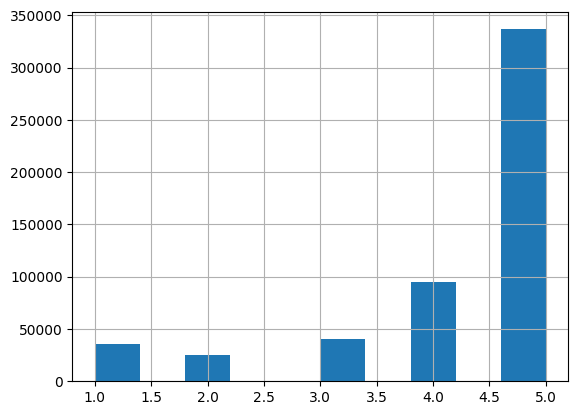

In [64]:
df_all_data_filtered_processed['review'].hist()
plt.show()
#Add axes.

In [65]:
df_all_data_filtered_processed.isna().sum()

title                         0
user_id                  125883
review                        0
text                          0
review_year                   0
authors                    6193
publisher                 84038
categories                67161
published_year                0
num_reviews                   0
cumulative_percentage         0
dtype: int64

In [66]:
df_all_data_filtered_processed.sample(10)

,title,user_id,review,text,review_year,authors,publisher,categories,published_year,num_reviews,cumulative_percentage
155014,Persuasion,A129IFEOFMZME5,5.0,This was the first Jane Austen book that I hav...,1999,[Jane Austen],"Little, Brown,",None,1899,5498,3.704777
399002,Who Moved My Cheese? An-Amazing Way to Deal wi...,A2OPOSSRHEZG5T,1.0,"Yes, thanks to &quot;Who Moved My Cheese,&quot...",2001,[Spencer Johnson],Penguin,[Business & Economics],1998,1882,11.265665
263680,Life on the Mississippi,A14C99ETXP32S0,5.0,I enjoyed this book very much when I was young...,2013,[Mark Twain],Penguin,[Travel],2009,946,18.881535
119042,The Picture of Dorian Gray,AV28O4SZKMDY6,5.0,This book contains the story 'The Picture of D...,2011,[Óscar Wilde],NaN,None,2016,5883,3.498575
68731,A Christmas carol: In prose,A1O7DBW20KMTEV,5.0,This is a classic and often repeated story for...,2013,[Charles Dickens],NaN,[Christmas stories],1845,1008,17.852361
17371,The Greatest Generation,NaN,5.0,I just finished reading &quot;The Greatest Gen...,1999,[Tom Brokaw],Delta,[History],2001,1587,13.136375
255962,Jane Eyre (Simple English),A22RYFVLP1EESO,4.0,"I first read the condensed version as a child,...",2012,[Charlotte Brontë],NaN,None,2021,1523,13.599036
64016,Great Expectations,A3IKBHODOTYYHM,4.0,I think that the character development alone m...,2002,[Charles Dickens],Penguin UK,[Fiction],2003,7421,2.559301
320846,Slaughterhouse-Five,A2OVM6T2ESEBRY,3.0,It is not my usual stuff but it had some inter...,2008,[Kurt Vonnegut],Dial Press Trade Paperback,[Fiction],1999,2975,7.303641
482374,"Ulysses,",A35UQ6D6N4LARQ,5.0,Just wanted my five stars to count..ive read a...,2001,[James Joyce],Vintage,[Fiction],1990,1221,15.711953


In [39]:
# #Download StopWords and Lemmatizer
# download("wordnet")
# lemmatizer = WordNetLemmatizer()

# download("stopwords")
# stop_words = stopwords.words("english")


# def preprocess_text(text):
#     #Preprocesing
#     text = text.lower() #To lower case
#     text = re.sub(r'[^a-z ]',' ',text) #Remove Any character that is not a letter
#     text = text.strip() #Remove White Spaces at the begin or the end of the text
#     text = re.sub(r'\s+',' ',text) #Change multiple white spaces to a single white space
#     text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text) # Remove tags
#     return text.split()

# def lemmatize_text(words, lemmatizer = lemmatizer):
#     tokens = [lemmatizer.lemmatize(word) for word in words]
#     tokens = [word for word in tokens if word not in stop_words]
#     tokens = [word for word in tokens if len(word) > 3]
#     return tokens

In [67]:
#Recomendacion de Manu para procesamiento
df_all_data_filtered_processed['num_row'] = np.arange(len(df_all_data_filtered_processed))

df_reduced = df_all_data_filtered_processed[['num_row', 'text']].copy()

df_reduced.sample(10)

,num_row,text
499664,499664,Although I found this novel a bit too windswep...
166920,166920,"Jane Austen, how can you go wrong?! One of the..."
332877,332877,Catch-22 is one of my top 5 or 6 novels of the...
343245,343245,I thought the book was great !! I was really s...
314504,314504,Jane Eyre is the story of a young orphaned gir...
211715,211715,The rave on the back cover from Publisher's We...
510372,510372,"Why is John Kerry a hero, you ask.Here's why:*..."
88192,88192,"Joseph Heller, in Catch-22, uses mainly humor,..."
358678,358678,Set in Victorian England a century ago this en...
387588,387588,Margaret Mitchell captures the essence of the ...


In [68]:
df_reduced.to_csv('../data/processed/df_reduced.csv')

In [ ]:
# df_reduced['preprocessed_text'] = df_reduced['text'].apply(lambda x: preprocess_text(x))

# df_reduced.sample(5)

In [123]:
# df_reduced['text'] = df_reduced['text'].apply(lambda x: lemmatize_text(x))

# df_reduced.sample(5)

,num_row,text
335236,335236,"[call, courage, story, part, story, boring, pa..."
1136575,1136575,"[received, book, already, technique, described..."
1898050,1898050,"[pyle, robin, hood, lovable, soul, child, simp..."
1486252,1486252,"[although, book, worth, read, serious, student..."
16931,16931,"[read, book, look, government, somewhat, distu..."


In [124]:
# df_reduced['text'] = df_reduced['text'].apply(lambda x: ' '.join(x))

# df_reduced.sample(5)

,num_row,text
1154222,1154222,must anyone interested history mathematics sel...
1771954,1771954,third grade teacher made read book made watch ...
1711449,1711449,everyone book great home left
1520419,1520419,begun reading know already benefit classic spi...
231470,231470,book nice collection robert louis stevenson st...


In [ ]:
# cache_dir = os.path.expanduser('~') + '/.cache/huggingface/hub'
# print(f'Huggingface cache directory: {cache_dir}')
# os.listdir(cache_dir)

In [ ]:
# sentiment_classifier_default = pipeline('sentiment-analysis')

In [ ]:
# def apply_sentiment_analysis_model(text_list):

#     try:
#         sentiment = sentiment_classifier_default(text_list)
#         return sentiment
#     except:        
#         return None

In [ ]:
# # timeit function: Permite tomar el tiempo a la funcion que estamos haciendo.

# batch_size = 100

# def process_batch(batch_df_text):    
#     result = apply_sentiment_analysis_model(batch_df_text)
#     return result

In [ ]:
# from tqdm import tqdm
# batch_size = 100
# results = []
# with tqdm(total=len(df_reduced)) as pbar:
#     for i in range(0, len(df_reduced), batch_size): #len(df_reduced)
#         batch = df_reduced.iloc[i:i + batch_size, 1].to_list()
#         result = apply_sentiment_analysis_model(batch)
#         results.append(result)
#         pbar.update(len(batch))

# final_result = pd.concat(results, ignore_index=True)

In [42]:
# #Creating a New column with sentiment prediction result from Hugging Face abilfad/sentiment-binary-dicoding model.
# df_all_data_filtered_processed['text_sentiment'] = df_all_data_filtered_processed['text'].apply(lambda x: apply_sentiment_analysis_model(x))

# df_all_data_filtered_processed.sample(10)

#También puedo llamar un script de python. Para que haga el procesamiento.

#Python Dask.

#Apache Spark - Paralelismo con maquinas (nodos)

In [43]:
# df_all_data_filtered_processed.sample(10)

,title,user_id,review,text,review_year,authors,publisher,categories,published_year
1395150,The Lord of the Rings (3 Volume Set),A2G2Q3BYNQXASC,2.0,This is one of the most acclaimed works in mod...,1999,[J. R. R. Tolkien],NaN,"[Baggins, Bilbo (Fictitious character)]",1996
1384705,Alice in Wonderland,NaN,5.0,I read Alice in Wonderland as a child and have...,1998,[Lewis Carroll],NaN,[Adventure and adventurers],1869
1420822,"Desecration: Left Behind, Volume 9",A1Q6IGTQ01JAZV,4.0,"Yes, I am still reading these books and I am s...",2004,"[Tim F. LaHaye, Jerry B. Jenkins]","Tyndale House Publishers, Inc.",[Fiction],2011
1081626,Me? Obey Him?,NaN,5.0,An essential handbook for for the sadly misled...,1998,[Elizabeth Rice Handford],Sword of the Lord Publishers,[Marriage],1995
1000042,Fiona Range,AOR3JKZ9QEFVN,2.0,You can almost see MMM trying to bring out the...,2002,[Mary McGarry Morris],Penguin,[Fiction],2001
776372,The War of the Worlds,ACV1LQOTQGJD6,4.0,When one listens to this tape you have to real...,2001,[H. G. Wells],First Avenue Editions ™,[Fiction],2017
1373364,To kill a mockingbird,NaN,5.0,To Kill A Mockingbird deals with large world i...,1999,[Harper Lee],Harper Collins,[Fiction],2014
64452,A Tree Grows in Brooklyn,A29OFQ7ZDJLCI2,5.0,This story is basically about the struggle to ...,2001,[Betty Smith],Random House,[Fiction],1992
31165,The biography of a grizzly,NaN,5.0,"I acquired this book at age 9-10. Now, at age ...",1999,[Ernest Thompson Seton],University of Oklahoma Press,[Nature],2015
369951,Perl and CGI for the World Wide Web (Visual Qu...,A3AX4XM1LHS0GU,3.0,The problem I found with this book was it's si...,2005,"[Castro, Negrino]",NaN,None,2003


In [44]:
# df_all_data_filtered_processed.to_csv('../data/processed/filtered_data_processed.csv')

In [45]:
# df_all_data_filtered_processed.boxplot(column=['review'])
# plt.show()

# df_rating_processed.hist(column=['review'])
# plt.show()

# df_rating_processed[df_rating_processed['title']== 'The Hobbit']['review'].mean()

# df_rating_processed[df_rating_processed['Title']== 'The Hobbit']['review/score'].describe()

# df_rating_processed[df_rating_processed['Title']== 'Atlas Shrugged']['review/score'].describe()